In [36]:
import pandas as pd
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
files = glob('內湖西段/日照/內湖西段-三期*.csv')
#print(files)
df = pd.concat(
    (pd.read_csv(file, usecols=['日照計'], dtype={'日照計':float}) for file in files), ignore_index=True)
df=df.dropna()
print(df.tail())

      日照計
2745  0.0
2746  0.0
2747  0.0
2748  0.0
2749  0.0


In [38]:
files = glob('內湖西段/溫度/內湖西段-三期*.csv')
#print(files)
df2 = pd.concat(
    (pd.read_csv(file, usecols=['溫度計'], dtype={'溫度計':float}) for file in files), ignore_index=True)

df2=df2.dropna()
print(df2.tail())

         溫度計
2745  26.213
2746  26.233
2747  25.950
2748  25.763
2749  25.617


In [39]:
files = glob('內湖西段/直流功率/內湖西段-三期*.csv')
#print(files)

df3 = pd.concat(
    (pd.read_csv(file, usecols=['三期_17-18:17:805:mppt1_power:315'], dtype={'三期_17-18:17:805:mppt1_power:315':float}) for file in files), ignore_index=True)

df3=df3.dropna(axis=0)
print(df3.tail())

      三期_17-18:17:805:mppt1_power:315
2745                              0.0
2746                              0.0
2747                              0.0
2748                              0.0
2749                              0.0


In [40]:
X=pd.concat([df,df2],axis=1)
Y=df3

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,shuffle=False)

print(X_train.shape,  X_test.shape, Y_train.shape,  Y_test.shape)

(1925, 2) (825, 2) (1925, 1) (825, 1)


In [42]:
model=LinearRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

In [43]:
Y_test=Y_test.reset_index(drop=True)

In [44]:
RMSE = math.sqrt(mean_squared_error(Y_test, predictions[:,0]))
print("RMSE=",Score)

RMSE= 0.03125260328583733


In [45]:
r2=r2_score(Y_test,predictions[:,0])
print("r2=",r2)

r2= 0.988028000792626


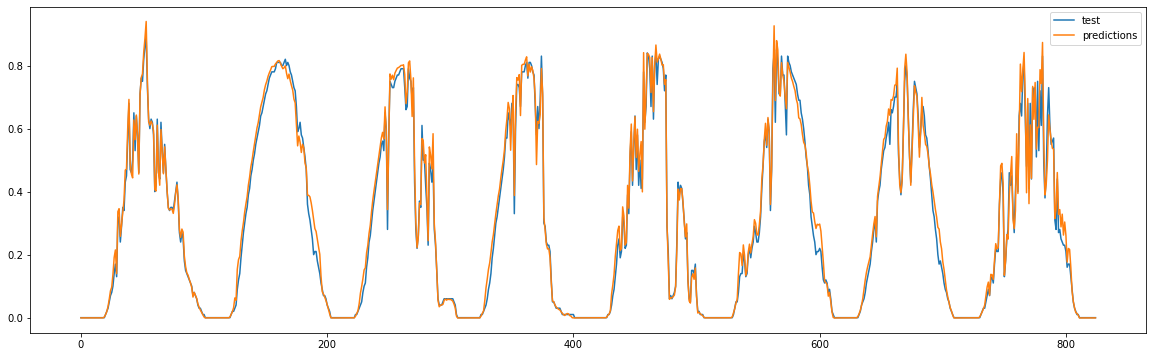

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(Y_test)
plt.plot(predictions)
plt.legend(['test', 'predictions'])